In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [17]:
from scipy.cluster.vq import vq, kmeans
from matplotlib import pyplot as plt
import time as t

In [36]:
input_img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_classification1/TestImages/Lenna.png")

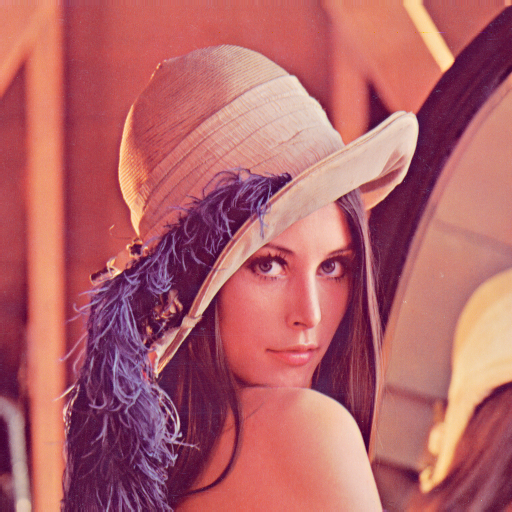

In [5]:
cv2_imshow(input_img)

In [6]:
height, width, channels = input_img.shape
print('(' ,height,',', width,',' ,channels,')')
print('H:', height)
print('W:', width)
print('C:', channels)

( 512 , 512 , 3 )
H: 512
W: 512
C: 3


In [7]:
pixel_data = np.float32(input_img.reshape((-1,3)))

In [8]:
number_of_clusters = 3
stop_conds= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90) 
number_of_attempts = 6

In [13]:
_, regions, centers  = cv2.kmeans(pixel_data, number_of_clusters, None, stop_conds, number_of_attempts , cv2.KMEANS_RANDOM_CENTERS)

In [10]:
print(regions)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [14]:
regions = np.uint8(centers)[regions.flatten()]
segmented_image = regions.reshape((input_img.shape))

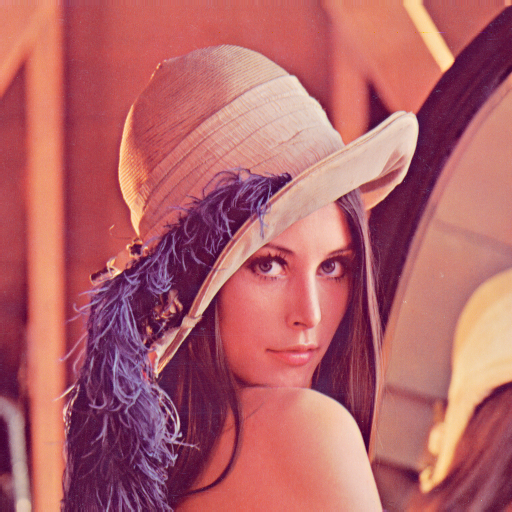

In [15]:
cv2_imshow(input_img)

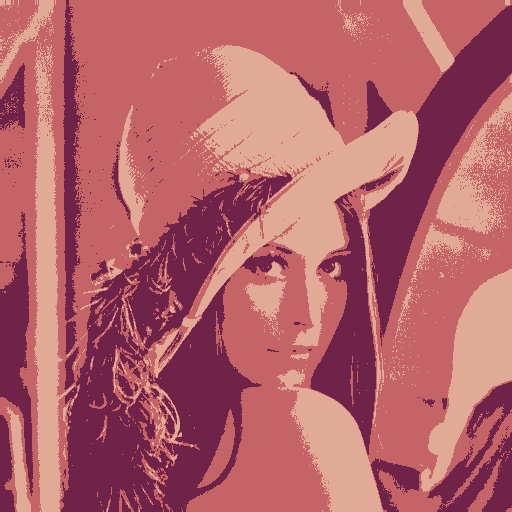

In [16]:
cv2_imshow(segmented_image)

In [23]:
def do_cluster(hsv_image, K, channels):
    # gets height, width and the number of channes from the image shape
    h,w,c = hsv_image.shape
    # prepares data for clustering by reshaping the image matrix into a (h*w) x c matrix of pixels
    cluster_data = hsv_image.reshape( (h*w,c) )
    # grabs the initial time
    t0 = t.time()
    # performs clustering
    codebook, distortion = kmeans(np.array(cluster_data[:,0:channels], dtype=np.float), K)
    # takes the final time
    t1 = t.time()
    print("Clusterization took %0.5",(t1-t0)," f seconds" )
    
    
    # calculates the total amount of pixels
    tot_pixels = h*w
    # generates clusters
    data, dist = vq(cluster_data[:,0:channels], codebook)
    # calculates the number of elements for each cluster
    weights = [len(data[data == i]) for i in range(0,K)]
    
    # creates a 4 column matrix in which the first element is the weight and the other three
    # represent the h, s and v values for each cluster
    color_rank = np.column_stack((weights, codebook))
    # sorts by cluster weight
    color_rank = color_rank[np.argsort(color_rank[:,0])]

    # creates a new blank image
    new_image =  np.array([0,0,255], dtype=np.uint8) * np.ones( (500, 500, 3), dtype=np.uint8)
    img_height = new_image.shape[0]
    img_width  = new_image.shape[1]

    # for each cluster
    for i,c in enumerate(color_rank[::-1]):
        
        # gets the weight of the cluster
        weight = c[0]
        
        # calculates the height and width of the bins
        height = int(weight/float(tot_pixels) *img_height )
        width = img_width/len(color_rank)

        # calculates the position of the bin
        x_pos = i*width


        
        # defines a color so that if less than three channels have been used
        # for clustering, the color has average saturation and luminosity value
        color = np.array( [0,128,200], dtype=np.uint8)
        
        # substitutes the known HSV components in the default color
        for j in range(len(c[1:])):
            color[j] = c[j+1]
        
        
        # draws the bin to the image
        new_image[ img_height-height:img_height, int(x_pos):int(x_pos+width)] = [color[0], color[1], color[2]]
        
    # returns the cluster representation
    return new_image

<ipython-input-23-ac84420b04f9>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  codebook, distortion = kmeans(np.array(cluster_data[:,0:channels], dtype=np.float), K)


Clusterization took %0.5 2.561025381088257  f seconds
Clusterization took %0.5 5.102146148681641  f seconds
Clusterization took %0.5 4.870273590087891  f seconds


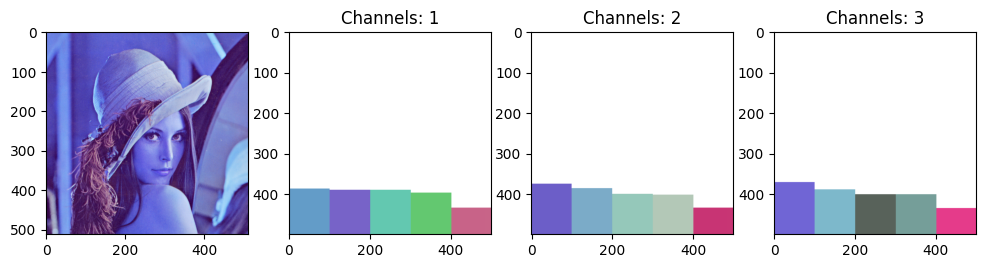

In [27]:
# creates a new figure size 12x10 inches
plt.figure(figsize=(12,10))
# creates a 4-column subplot
plt.subplot(141)
# in the first cell draws the target image
plt.imshow(input_img)

# calculates clusters for
# * h
# * h and s
# * h, s and v

for i in range(1,4):
    plt.subplot(141 + i)
    plt.title("Channels: %i" % i)
    new_image = do_cluster(input_img, 5, i)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)
    plt.imshow(new_image)
    
plt.show()

#Try with different version of the image RGB

In [37]:
img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

In [29]:
pixel_data = np.float32(img.reshape((-1,3)))

In [30]:
number_of_clusters = 3
stop_conds= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90) 
number_of_attempts = 6

In [31]:
_, regions, centers  = cv2.kmeans(pixel_data, number_of_clusters, None, stop_conds, number_of_attempts , cv2.KMEANS_RANDOM_CENTERS) 

In [32]:
# convert data to image format again again, with its original dimensions
regions = np.uint8(centers)[regions.flatten()]
segmented_image = regions.reshape((img.shape))

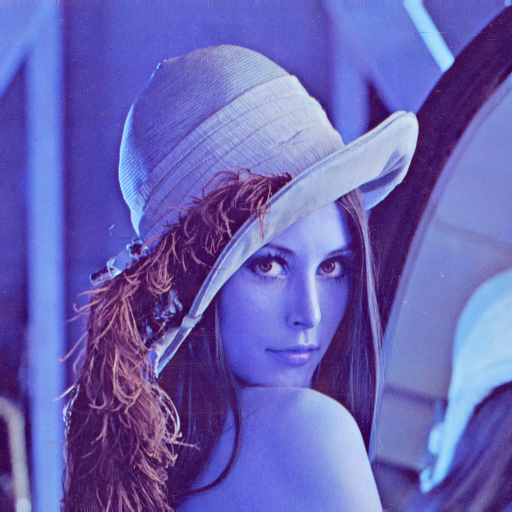

In [38]:
cv2_imshow(img)

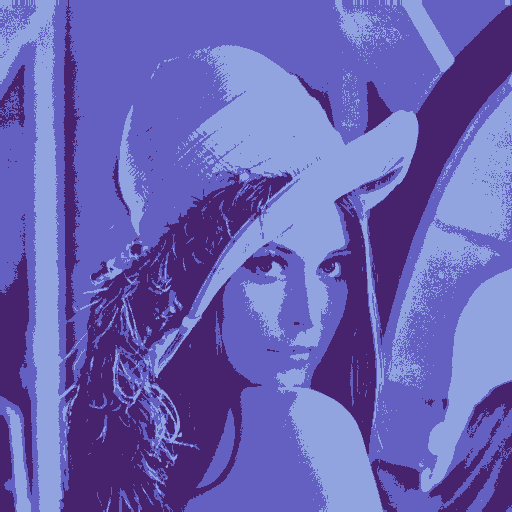

In [33]:
cv2_imshow(segmented_image)

<ipython-input-23-ac84420b04f9>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  codebook, distortion = kmeans(np.array(cluster_data[:,0:channels], dtype=np.float), K)


Clusterization took %0.5 2.8921375274658203  f seconds
Clusterization took %0.5 4.59625768661499  f seconds
Clusterization took %0.5 4.501604795455933  f seconds


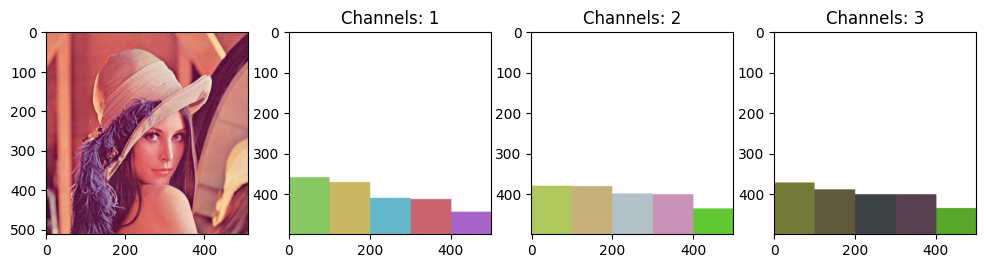

In [25]:
# creates a new figure size 12x10 inches
plt.figure(figsize=(12,10))
# creates a 4-column subplot
plt.subplot(141)
# in the first cell draws the target image
plt.imshow(img)

# calculates clusters for
# * h
# * h and s
# * h, s and v

for i in range(1,4):
    plt.subplot(141 + i)
    plt.title("Channels: %i" % i)
    new_image = do_cluster(img, 5, i)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)
    plt.imshow(new_image)
    
plt.show()

NOTE: the images looks different because I used two different libraries to show them
- pyplot
- opencv
But the image is the same in each section, to visualize in different ways the operations